#Librerias

In [2]:
pip install facenet-pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 22.7 MB/s eta 0:00:00


In [3]:
import torch
from PIL import Image, ImageDraw
from facenet_pytorch import MTCNN, InceptionResnetV1
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt

#Deteccion de rostros y extraccion de caracteristicas

In [4]:
# Cargar el modelo preentrenado de detección de rostros y extracción de características
mtcnn = MTCNN(image_size=160, margin=0, min_face_size=20)
resnet = InceptionResnetV1(pretrained='vggface2').eval()

  0%|          | 0.00/107M [00:00<?, ?B/s]

#Imagenes

In [5]:
# Cargar las imágenes de Yamil, David, Massiel y Carlos
yamil_images = [
    "/content/Rostros/Yamil/yamil1.jpeg",
    "/content/Rostros/Yamil/yamil2.jpeg",
    "/content/Rostros/Yamil/yamil3.jpg",
    "/content/Rostros/Yamil/yamil4.jpg",
    "/content/Rostros/Yamil/yamil5.jpg"
]

david_images = [
    "/content/Rostros/David/david1.jpeg",
    "/content/Rostros/David/david2.jpeg",
    "/content/Rostros/David/david3.jpeg",
    "/content/Rostros/David/david4.jpeg",
    "/content/Rostros/David/david5.jpeg"
]

massiel_images = [
    "/content/Rostros/Massiel/massiel1.jpeg",
    "/content/Rostros/Massiel/massiel2.jpeg",
    "/content/Rostros/Massiel/massiel3.jpeg",
    "/content/Rostros/Massiel/massiel4.jpeg",
    "/content/Rostros/Massiel/massiel5.jpeg"
]

carlos_images = [
    "/content/Rostros/Carlos/carlos1.jpeg",
    "/content/Rostros/Carlos/carlos2.jpeg",
    "/content/Rostros/Carlos/carlos3.jpeg",
    "/content/Rostros/Carlos/carlos4.jpeg",
    "/content/Rostros/Carlos/carlos5.jpeg"
]

#Vectores de caracteristicas

In [6]:
# Obtener los vectores de características de Yamil
embeddings_yamil = []
for image_path in yamil_images:
    yamil_image = Image.open(image_path).convert("RGB")
    yamil_face = mtcnn(yamil_image)
    yamil_embedding = resnet(yamil_face.unsqueeze(0)).detach().numpy()
    embeddings_yamil.append(yamil_embedding)

# Obtener los vectores de características de David
embeddings_david = []
for image_path in david_images:
    david_image = Image.open(image_path).convert("RGB")
    david_face = mtcnn(david_image)
    david_embedding = resnet(david_face.unsqueeze(0)).detach().numpy()
    embeddings_david.append(david_embedding)
    
# Obtener los vectores de características de Massiel
embeddings_massiel = []
for image_path in massiel_images:
    massiel_image = Image.open(image_path).convert("RGB")
    massiel_face = mtcnn(massiel_image)
    massiel_embedding = resnet(massiel_face.unsqueeze(0)).detach().numpy()
    embeddings_massiel.append(massiel_embedding)
    
# Obtener los vectores de características de Carlos
embeddings_carlos = []
for image_path in carlos_images:
    carlos_image = Image.open(image_path).convert("RGB")
    carlos_face = mtcnn(carlos_image)
    carlos_embedding = resnet(carlos_face.unsqueeze(0)).detach().numpy()
    embeddings_carlos.append(carlos_embedding)

#Prueba

In [11]:
# Cargar imagen de prueba
imagen_prueba = Image.open("/content/Pruebas/yamil_prueba2.jpeg").convert("RGB")
face_prueba = mtcnn(imagen_prueba)
embedding_prueba = resnet(face_prueba.unsqueeze(0)).detach().numpy()

#Similitud coseno

El rostro se parece a Yamil


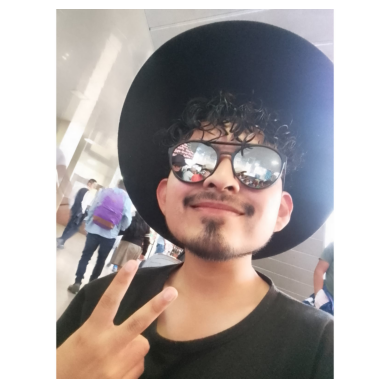

In [10]:
# Calcular la similitud de coseno entre la imagen de prueba y cada persona de interés
similarity_scores_yamil = [cosine(embedding_prueba.flatten(), embedding_yamil.flatten()) for embedding_yamil in embeddings_yamil]
similarity_scores_david = [cosine(embedding_prueba.flatten(), embedding_david.flatten()) for embedding_david in embeddings_david]
similarity_scores_massiel = [cosine(embedding_prueba.flatten(), embedding_massiel.flatten()) for embedding_massiel in embeddings_massiel]
similarity_scores_carlos = [cosine(embedding_prueba.flatten(), embedding_carlos.flatten()) for embedding_carlos in embeddings_carlos]

# Definir el umbral de similitud
threshold = 0.4

# Verificar la similitud con cada persona de interés y mostrar el resultado
if any(score < threshold for score in similarity_scores_yamil) and all(score >= threshold for score in similarity_scores_david) and all(score >= threshold for score in similarity_scores_massiel) and all(score >= threshold for score in similarity_scores_carlos):
    # El rostro se parece más a Yamil
    print("El rostro se parece a Yamil")
elif all(score >= threshold for score in similarity_scores_yamil) and any(score < threshold for score in similarity_scores_david) and all(score >= threshold for score in similarity_scores_massiel) and all(score >= threshold for score in similarity_scores_carlos):
    # El rostro se parece más a David
    print("El rostro se parece  a David")
elif any(score < threshold for score in similarity_scores_massiel) and all(score >= threshold for score in similarity_scores_david) and all(score >= threshold for score in similarity_scores_yamil) and all(score >= threshold for score in similarity_scores_carlos):
    # El rostro se parece más a Massiel
    print("El rostro se parece a Massiel")
elif any(score < threshold for score in similarity_scores_carlos) and all(score >= threshold for score in similarity_scores_david) and all(score >= threshold for score in similarity_scores_yamil) and all(score >= threshold for score in similarity_scores_massiel):
    # El rostro se parece más a Carlos
    print("El rostro se parece a Carlos")
else:
    # El rostro no se parece claramente a Selena Gomez ni a David
    print("El rostro no se parece a Yamil, David, Massiel o Carlos")
plt.imshow(imagen_prueba)
plt.axis('off')
plt.show()

In [12]:
# Cargar imagen de prueba
imagen_prueba = Image.open("/content/Pruebas/massiel_prueba.jpeg").convert("RGB")
face_prueba = mtcnn(imagen_prueba)
embedding_prueba = resnet(face_prueba.unsqueeze(0)).detach().numpy()

El rostro se parece a Massiel


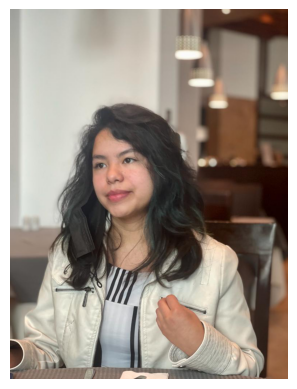

In [14]:
# Calcular la similitud de coseno entre la imagen de prueba y cada persona de interés
similarity_scores_yamil = [cosine(embedding_prueba.flatten(), embedding_yamil.flatten()) for embedding_yamil in embeddings_yamil]
similarity_scores_david = [cosine(embedding_prueba.flatten(), embedding_david.flatten()) for embedding_david in embeddings_david]
similarity_scores_massiel = [cosine(embedding_prueba.flatten(), embedding_massiel.flatten()) for embedding_massiel in embeddings_massiel]
similarity_scores_carlos = [cosine(embedding_prueba.flatten(), embedding_carlos.flatten()) for embedding_carlos in embeddings_carlos]

# Definir el umbral de similitud
threshold = 0.4

# Verificar la similitud con cada persona de interés y mostrar el resultado
if any(score < threshold for score in similarity_scores_yamil) and all(score >= threshold for score in similarity_scores_david) and all(score >= threshold for score in similarity_scores_massiel) and all(score >= threshold for score in similarity_scores_carlos):
    # El rostro se parece más a Yamil
    print("El rostro se parece a Yamil")
elif all(score >= threshold for score in similarity_scores_yamil) and any(score < threshold for score in similarity_scores_david) and all(score >= threshold for score in similarity_scores_massiel) and all(score >= threshold for score in similarity_scores_carlos):
    # El rostro se parece más a David
    print("El rostro se parece  a David")
elif any(score < threshold for score in similarity_scores_massiel) and all(score >= threshold for score in similarity_scores_david) and all(score >= threshold for score in similarity_scores_yamil) and all(score >= threshold for score in similarity_scores_carlos):
    # El rostro se parece más a Massiel
    print("El rostro se parece a Massiel")
elif any(score < threshold for score in similarity_scores_carlos) and all(score >= threshold for score in similarity_scores_david) and all(score >= threshold for score in similarity_scores_yamil) and all(score >= threshold for score in similarity_scores_massiel):
    # El rostro se parece más a Carlos
    print("El rostro se parece a Carlos")
else:
    # El rostro no se parece claramente a Selena Gomez ni a David
    print("El rostro no se parece a Yamil, David, Massiel o Carlos")
plt.imshow(imagen_prueba)
plt.axis('off')
plt.show()

In [15]:
# Cargar imagen de prueba
imagen_prueba = Image.open("/content/Pruebas/david_prueba.jpeg").convert("RGB")
face_prueba = mtcnn(imagen_prueba)
embedding_prueba = resnet(face_prueba.unsqueeze(0)).detach().numpy()

El rostro se parece  a David


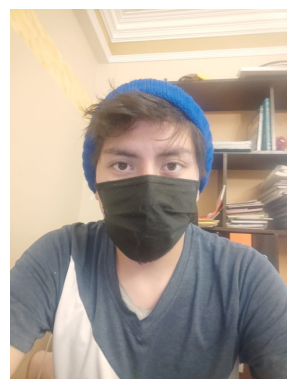

In [16]:
# Calcular la similitud de coseno entre la imagen de prueba y cada persona de interés
similarity_scores_yamil = [cosine(embedding_prueba.flatten(), embedding_yamil.flatten()) for embedding_yamil in embeddings_yamil]
similarity_scores_david = [cosine(embedding_prueba.flatten(), embedding_david.flatten()) for embedding_david in embeddings_david]
similarity_scores_massiel = [cosine(embedding_prueba.flatten(), embedding_massiel.flatten()) for embedding_massiel in embeddings_massiel]
similarity_scores_carlos = [cosine(embedding_prueba.flatten(), embedding_carlos.flatten()) for embedding_carlos in embeddings_carlos]

# Definir el umbral de similitud
threshold = 0.4

# Verificar la similitud con cada persona de interés y mostrar el resultado
if any(score < threshold for score in similarity_scores_yamil) and all(score >= threshold for score in similarity_scores_david) and all(score >= threshold for score in similarity_scores_massiel) and all(score >= threshold for score in similarity_scores_carlos):
    # El rostro se parece más a Yamil
    print("El rostro se parece a Yamil")
elif all(score >= threshold for score in similarity_scores_yamil) and any(score < threshold for score in similarity_scores_david) and all(score >= threshold for score in similarity_scores_massiel) and all(score >= threshold for score in similarity_scores_carlos):
    # El rostro se parece más a David
    print("El rostro se parece  a David")
elif any(score < threshold for score in similarity_scores_massiel) and all(score >= threshold for score in similarity_scores_david) and all(score >= threshold for score in similarity_scores_yamil) and all(score >= threshold for score in similarity_scores_carlos):
    # El rostro se parece más a Massiel
    print("El rostro se parece a Massiel")
elif any(score < threshold for score in similarity_scores_carlos) and all(score >= threshold for score in similarity_scores_david) and all(score >= threshold for score in similarity_scores_yamil) and all(score >= threshold for score in similarity_scores_massiel):
    # El rostro se parece más a Carlos
    print("El rostro se parece a Carlos")
else:
    # El rostro no se parece claramente a Selena Gomez ni a David
    print("El rostro no se parece a Yamil, David, Massiel o Carlos")
plt.imshow(imagen_prueba)
plt.axis('off')
plt.show()

In [17]:
# Cargar imagen de prueba
imagen_prueba = Image.open("/content/Pruebas/carlos_prueba.jpeg").convert("RGB")
face_prueba = mtcnn(imagen_prueba)
embedding_prueba = resnet(face_prueba.unsqueeze(0)).detach().numpy()

El rostro se parece a Carlos


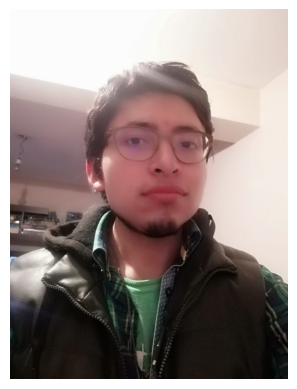

In [18]:
# Calcular la similitud de coseno entre la imagen de prueba y cada persona de interés
similarity_scores_yamil = [cosine(embedding_prueba.flatten(), embedding_yamil.flatten()) for embedding_yamil in embeddings_yamil]
similarity_scores_david = [cosine(embedding_prueba.flatten(), embedding_david.flatten()) for embedding_david in embeddings_david]
similarity_scores_massiel = [cosine(embedding_prueba.flatten(), embedding_massiel.flatten()) for embedding_massiel in embeddings_massiel]
similarity_scores_carlos = [cosine(embedding_prueba.flatten(), embedding_carlos.flatten()) for embedding_carlos in embeddings_carlos]

# Definir el umbral de similitud
threshold = 0.4

# Verificar la similitud con cada persona de interés y mostrar el resultado
if any(score < threshold for score in similarity_scores_yamil) and all(score >= threshold for score in similarity_scores_david) and all(score >= threshold for score in similarity_scores_massiel) and all(score >= threshold for score in similarity_scores_carlos):
    # El rostro se parece más a Yamil
    print("El rostro se parece a Yamil")
elif all(score >= threshold for score in similarity_scores_yamil) and any(score < threshold for score in similarity_scores_david) and all(score >= threshold for score in similarity_scores_massiel) and all(score >= threshold for score in similarity_scores_carlos):
    # El rostro se parece más a David
    print("El rostro se parece  a David")
elif any(score < threshold for score in similarity_scores_massiel) and all(score >= threshold for score in similarity_scores_david) and all(score >= threshold for score in similarity_scores_yamil) and all(score >= threshold for score in similarity_scores_carlos):
    # El rostro se parece más a Massiel
    print("El rostro se parece a Massiel")
elif any(score < threshold for score in similarity_scores_carlos) and all(score >= threshold for score in similarity_scores_david) and all(score >= threshold for score in similarity_scores_yamil) and all(score >= threshold for score in similarity_scores_massiel):
    # El rostro se parece más a Carlos
    print("El rostro se parece a Carlos")
else:
    # El rostro no se parece claramente a Selena Gomez ni a David
    print("El rostro no se parece a Yamil, David, Massiel o Carlos")
plt.imshow(imagen_prueba)
plt.axis('off')
plt.show()